In [7]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../../'))

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from scripts.data_loading import load_dataset
from scripts.data_description import *
from scripts.text_analysis import *
from scripts.time_series_analysis import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kaleb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
stock_data = pd.read_csv("../../../data/yfinance_data/AMZN_historical_data.csv")

print(stock_data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
news_data = load_dataset('../../../data/raw_analyst_ratings.csv')
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [13]:
def extract_date_features(df, date_column):
    """
    Extract and analyze date-related features from the dataset.
    """
    df[date_column] = pd.to_datetime(df[date_column], utc=True, errors='coerce')
    df['day'] = df[date_column].dt.date
    df['month'] = df[date_column].dt.to_period('M')
    df['day_of_week'] = df[date_column].dt.day_name()
    return df
df = extract_date_features(news_data, 'date')
df.head()

/tmp/ipykernel_125026/1392032321.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df[date_column].dt.to_period('M')


,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,2020-06,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,2020-06,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,2020-05,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,2020-05,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,2020-05,Friday


In [14]:
news_data['Date'] = pd.to_datetime(news_data['day'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

news_data = news_data[news_data['stock'] == 'AMZN']

merged_df = pd.merge(news_data, stock_data, on='Date', how='inner') 

In [15]:
merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 17:18:50+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0
1,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 15:33:26+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0
2,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 11:53:47+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0
3,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10 11:20:03+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0
4,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 04:52:01+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0


/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/correlation/../../../scripts/text_analysis.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])
/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/correlation/../../../scripts/text_analysis.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'neutral', 'positive'])


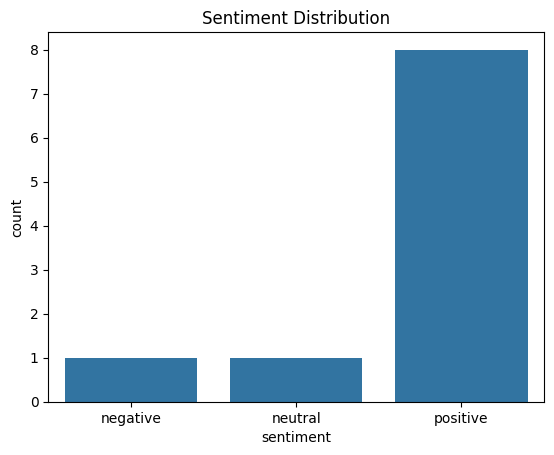

In [16]:
merged_df = perform_sentiment_analysis(merged_df.iloc[:100000, :], 'headline')

In [17]:
merged_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day,month,day_of_week,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment_score,sentiment
0,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 17:18:50+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0,0.1779,positive
1,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 15:33:26+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0,0.5574,positive
2,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 11:53:47+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0,0.2023,positive
3,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10 11:20:03+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0,0.6486,positive
4,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 04:52:01+00:00,AMZN,2020-06-10,2020-06,Wednesday,2020-06-10,132.25,136.117493,131.313004,132.372498,132.372498,98920000,0.0,0.0,0.0516,positive


In [18]:
# Calculate daily stock returns
merged_df['Stock_Return'] = merged_df['Adj Close'].pct_change()  # Percentage change in closing prices


In [19]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
merged_df['sentiment'] = merged_df['sentiment'].map(sentiment_mapping)

In [20]:

correlation = merged_df[['sentiment', 'Stock_Return']].corr().iloc[0, 1]
print(f'Correlation between news sentiment and stock returns: {correlation}')


Correlation between news sentiment and stock returns: 0.35355339059327373
